In [69]:
import pandas as pd
Data=pd.read_csv('/content/insurance (1).csv')

In [70]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
Data['sex']=Data['sex'].astype('category').cat.codes

In [72]:
Data['smoker']=Data['smoker'].astype('category').cat.codes

In [73]:
Data['region']=Data['region'].astype('category').cat.codes

In [74]:
Data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [75]:
Data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(Data[['age','sex','bmi','children','smoker','region']]),Data['charges'], test_size=0.33, random_state=42)

In [77]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(6,)))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(24,activation='relu'))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
history=model.fit(X_train,y_train,use_multiprocessing=True,validation_split=0.33,epochs=500)


Epoch 1/500
19/19 [==============================] - 1s 11ms/step - loss: 336362520.0000 - accuracy: 0.0000e+00 - val_loss: 322142880.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 319716456.0000 - accuracy: 0.0000e+00 - val_loss: 322120128.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 338061763.2000 - accuracy: 0.0000e+00 - val_loss: 322082144.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 315968717.6000 - accuracy: 0.0000e+00 - val_loss: 322021024.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 316313465.6000 - accuracy: 0.0000e+00 - val_loss: 321922624.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 342963636.8000 - accuracy: 0.0000e+00 - val_loss: 321778336.0000 - val_accuracy: 0.0000e+00
Epoch 7/5

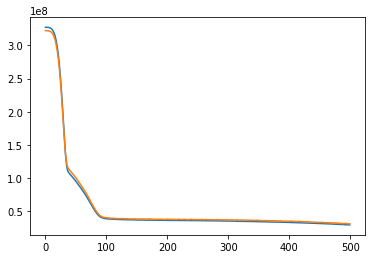

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [79]:
from sklearn.metrics import r2_score
r2_score(model.predict(X_test),y_test)

0.7710918131694138

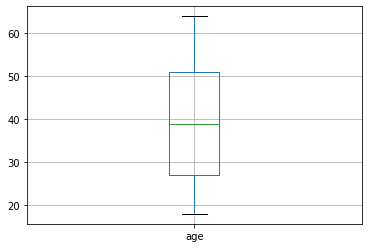

In [80]:
Data.boxplot(column=['age'])

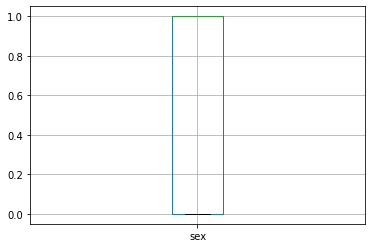

In [81]:
Data.boxplot(column=['sex'])

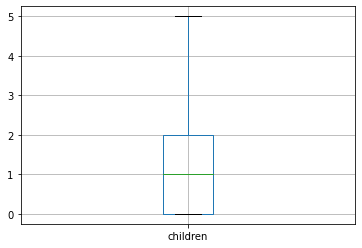

In [82]:
Data.boxplot(column=['children'])

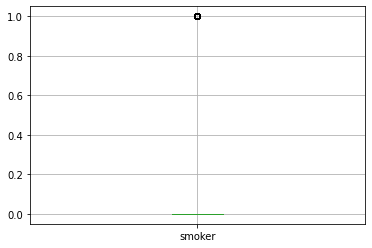

In [83]:
Data.boxplot(column=['smoker'])

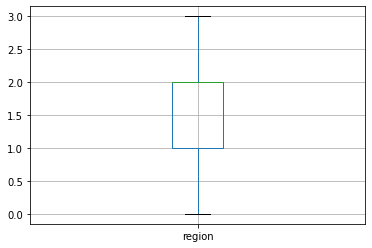

In [84]:
Data.boxplot(column=['region'])

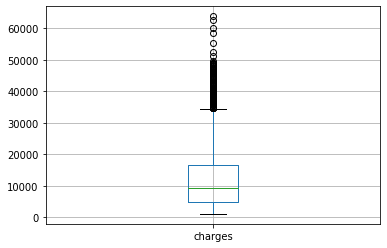

In [85]:
Data.boxplot(column=['charges'])

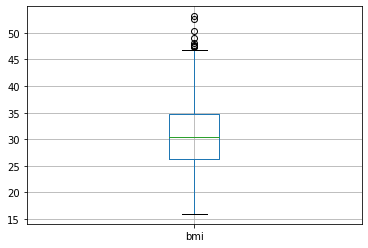

In [86]:
Data.boxplot(column=['bmi'])

In [87]:
l1=list(Data.columns)
l1.pop()

'charges'

In [88]:
print(l1)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [89]:
for features in l1:
  Data=Data[Data[features]<=(Data[features].quantile(0.99))].copy()

In [90]:
for features in l1:
  Data=Data[Data[features]>=(Data[features].quantile(0.01))].copy()

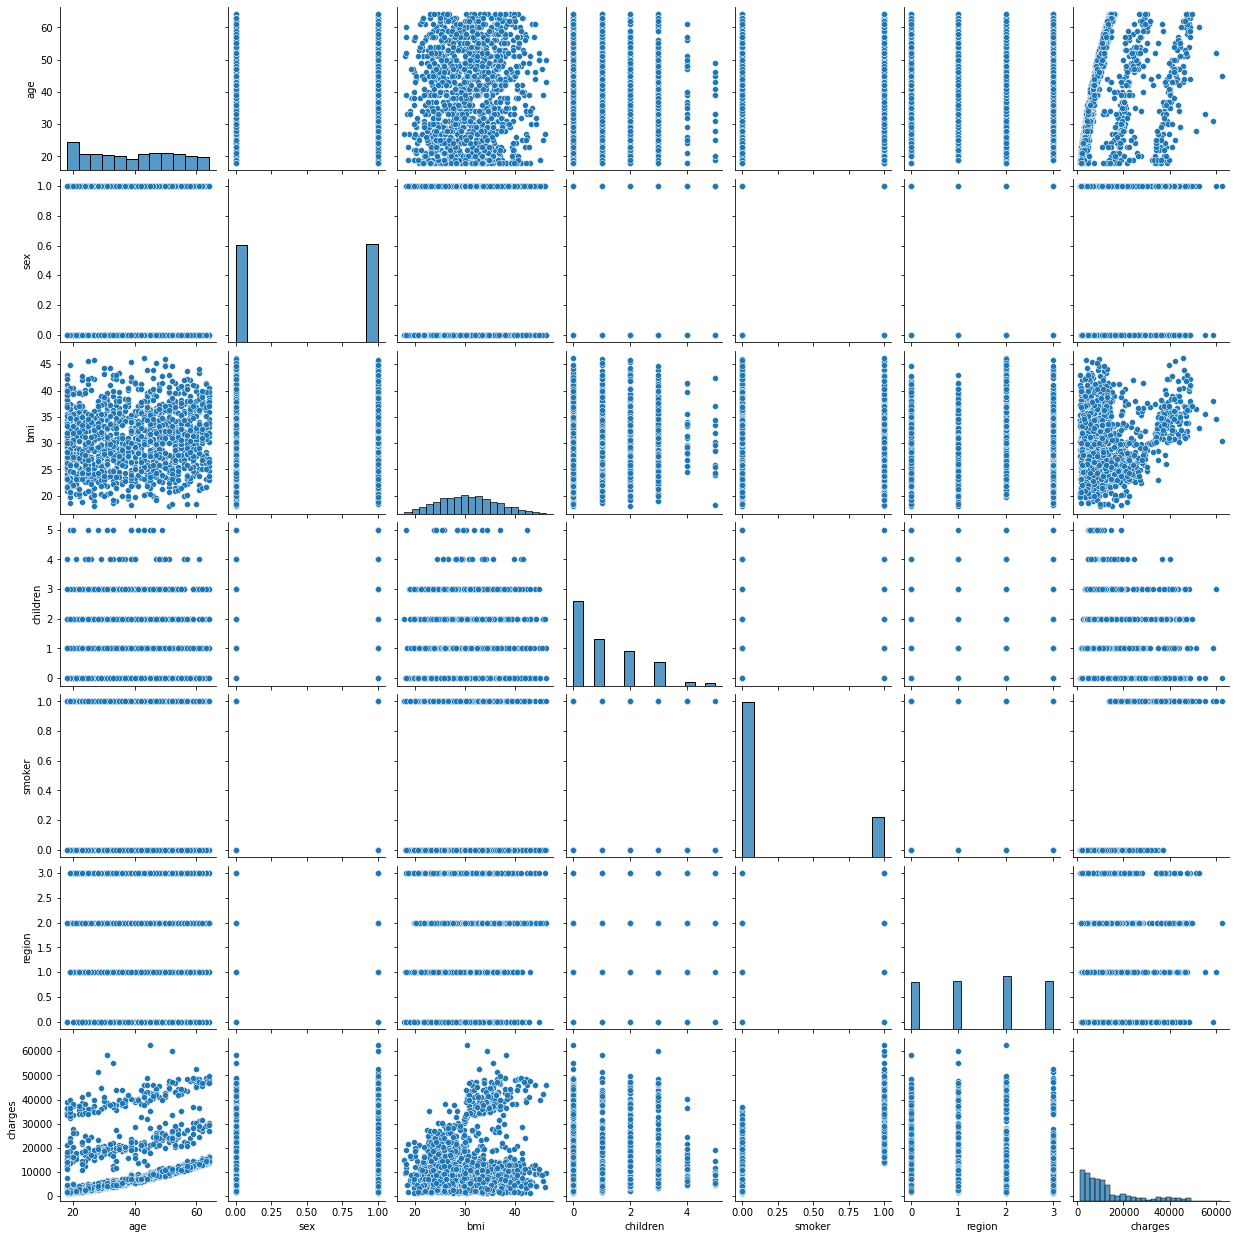

In [118]:
import seaborn as sns
sns.pairplot(Data, diag_kind="hist")

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(Data[['age','sex','bmi','children','smoker','region']]),Data['charges'], test_size=0.33, random_state=42)

In [92]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(6,)))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(24,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(6,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(3,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
history=model.fit(X_train,y_train,use_multiprocessing=True,validation_split=0.33,epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 11ms/step - loss: 319300118.4000 - accuracy: 0.0000e+00 - val_loss: 326341984.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 302129449.6000 - accuracy: 0.0000e+00 - val_loss: 326246720.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 283193124.0000 - accuracy: 0.0000e+00 - val_loss: 326104736.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 314311187.2000 - accuracy: 0.0000e+00 - val_loss: 325899968.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 277615380.8000 - accuracy: 0.0000e+00 - val_loss: 325606528.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 290725904.0000 - accuracy: 0.0000e+00 - val_loss: 325190688.0000 - val_accuracy: 0.0000e+00
Epoch 7/5

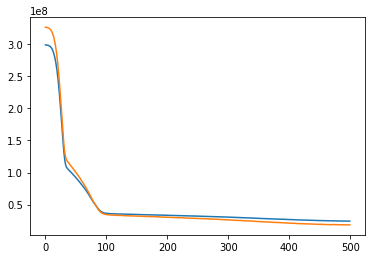

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [94]:
from sklearn.metrics import r2_score
r2_score(model.predict(X_test),y_test)

0.7990102402441717

In [109]:
from sklearn.svm import SVR
regr =SVR(kernel='poly',degree=10).fit(X_train,y_train)
regr.score(X_test,y_test)

0.7074591415387729

In [96]:
Data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.016389,0.095784,0.038653,-0.024269,-0.003356,0.298359
sex,-0.016389,1.000000,0.039933,0.022198,0.083179,0.005398,0.067586
bmi,0.095784,0.039933,1.000000,0.002881,0.002899,0.140329,0.194409
children,0.038653,0.022198,0.002881,1.000000,0.005412,0.017055,0.068174
smoker,-0.024269,0.083179,0.002899,0.005412,1.000000,-0.001558,0.787268
region,-0.003356,0.005398,0.140329,0.017055,-0.001558,1.000000,-0.012498
charges,0.298359,0.067586,0.194409,0.068174,0.787268,-0.012498,1.000000


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(Data[['smoker']]),Data['charges'], test_size=0.33, random_state=42)

In [111]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(24,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(12,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(6,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(3,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal()))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
history=model.fit(X_train,y_train,use_multiprocessing=True,validation_split=0.33,epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 11ms/step - loss: 305493310.4000 - accuracy: 0.0000e+00 - val_loss: 326411552.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 281457624.8000 - accuracy: 0.0000e+00 - val_loss: 326392896.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 303759688.0000 - accuracy: 0.0000e+00 - val_loss: 326362304.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 304614721.6000 - accuracy: 0.0000e+00 - val_loss: 326316640.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
19/19 [==============================] - 0s 4ms/step - loss: 313449289.6000 - accuracy: 0.0000e+00 - val_loss: 326248704.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 301392494.4000 - accuracy: 0.0000e+00 - val_loss: 326152512.0000 - val_accuracy: 0.0000e+00
Epoch 7/5

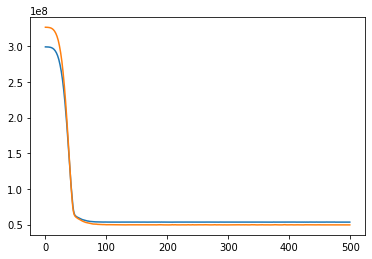

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [113]:
from sklearn.metrics import r2_score
r2_score(model.predict(X_test),y_test)

0.24589353634219702

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(Data[['age','sex','bmi','children','smoker','region']]),Data['charges'], test_size=0.33, random_state=42)

In [148]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective='reg:tweedie',n_estimators=100).fit(X_train,y_train)
xgb_r.score(X_test,y_test)

0.8606658125755062

<BarContainer object of 5 artists>

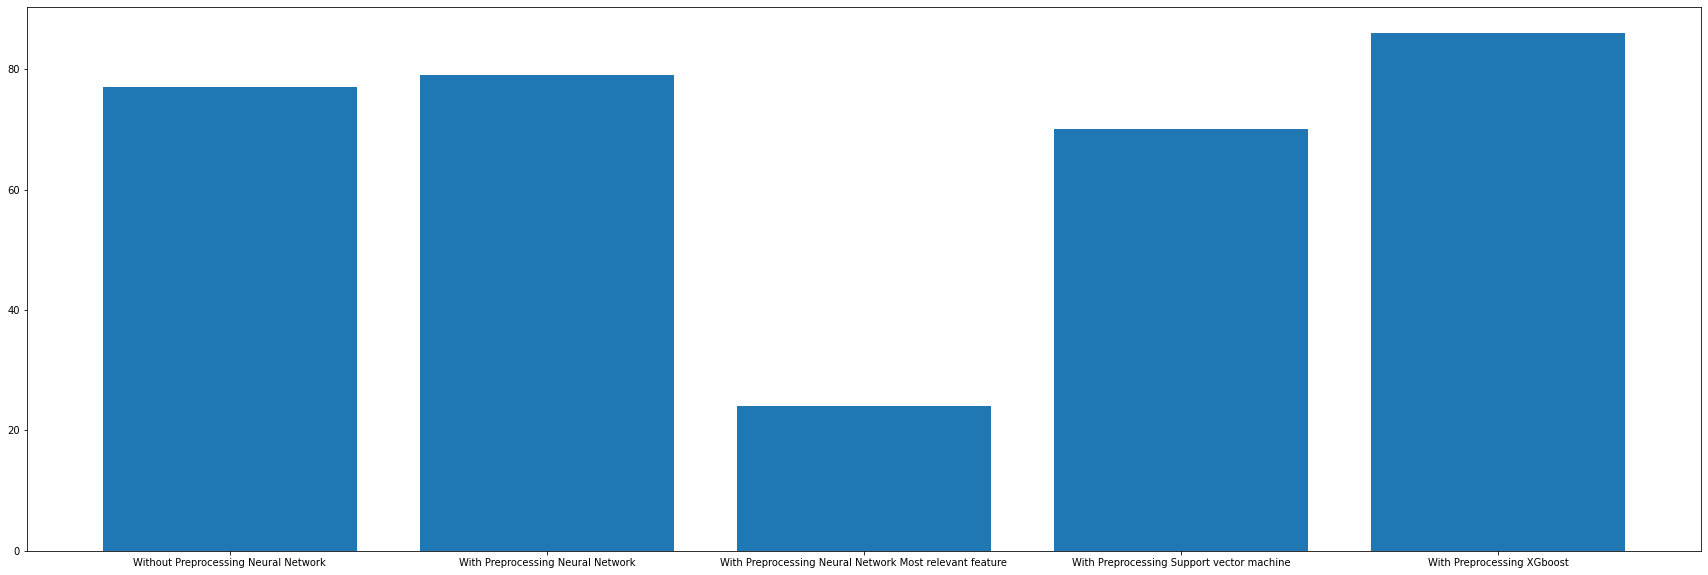

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.bar(['Without Preprocessing Neural Network','With Preprocessing Neural Network','With Preprocessing Neural Network Most relevant feature','With Preprocessing Support vector machine','With Preprocessing XGboost'],[77,79,24,70,86],label='r2 score')